# Machine Learning Assignment 2 by Immad Shahid

## Titanic Dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
uploaded = files.upload()

Saving iris.data.csv to iris.data.csv


In [ ]:
titanic = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
iris = pd.read_csv("iris.data.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
titanic.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
X

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0
...,...,...,...,...,...
886,2,male,27.0,0,0
887,1,female,19.0,0,0
888,3,female,NaN,1,2
889,1,male,26.0,0,0


In [17]:
y = titanic['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
imp = SimpleImputer(strategy='median')

In [23]:
ohe = OneHotEncoder(handle_unknown = 'ignore',sparse_output=False)

In [24]:
ct = ColumnTransformer([('imputer', imp, ['Age']), ('onehotencoder', ohe, ['Sex'])],  remainder = 'passthrough')

In [26]:
clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [28]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
pipe = Pipeline([
    ('preprocessor', ct),
    ('classifier', clf)]
)

In [29]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex'])])),
                ('classifier', RandomForestClassifier())])

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex'])])),
                ('classifier', RandomForestClassifier())])

In [31]:
y_pred = pipe.predict(X_test)

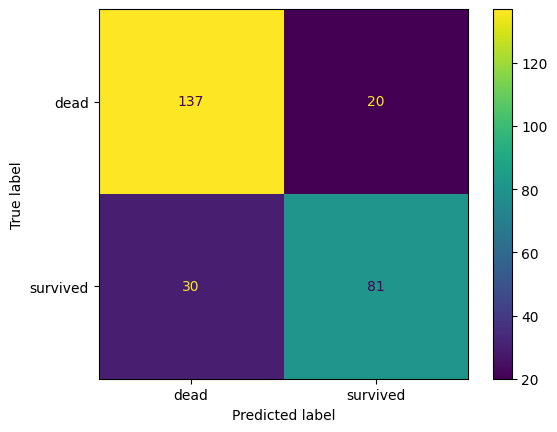

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ['dead', 'survived'])

In [35]:
print(classification_report(y_test, y_pred, target_names = ['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.82      0.87      0.85       157
    survived       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [40]:
params = {'classifier__max_depth':  range(1,10)
}

In [41]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,
                    params,
                    cv=10,
                    scoring='accuracy',
                    verbose=1,
                    return_train_score=True,
                    n_jobs=-1)

In [42]:
grid.fit(X_train, y_train);


Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [43]:
grid.best_params_

{'classifier__max_depth': 7}

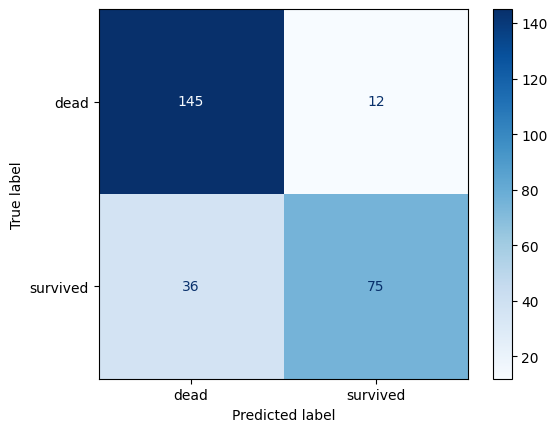

In [44]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, display_labels=['dead', 'survived'], cmap='Blues', values_format='d')

In [45]:
y_pred = grid.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [47]:
df_cv_results = pd.DataFrame(grid.cv_results_)

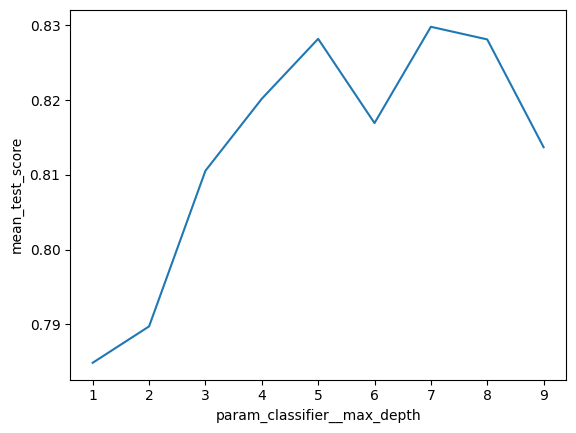

In [48]:
sns.lineplot(x='param_classifier__max_depth', y='mean_test_score',  data=df_cv_results);

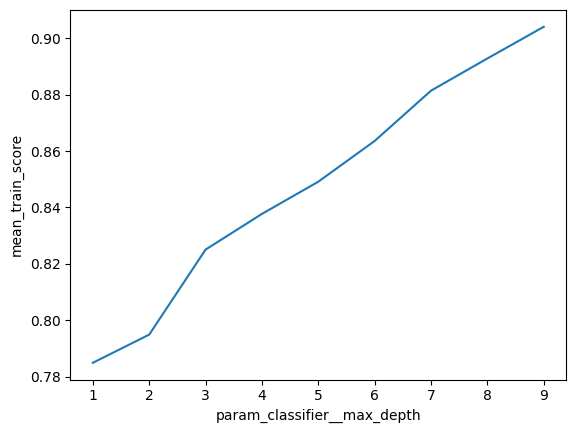

In [49]:
sns.lineplot(x='param_classifier__max_depth', y='mean_train_score', data=df_cv_results);

The Titanic Dataset has an Accuracy of 82% means Dead are 157 whereas 111 survived. 

## Iris Dataset

In [62]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [57]:
iris = pd.read_csv("iris.data.csv")

In [50]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [51]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [52]:
iris.duplicated().sum()

3

In [53]:
iris.isnull().sum()

,0
5.1,0
3.5,0
1.4,0
0.2,0
Iris-setosa,0


In [54]:
iris.dtypes

,0
5.1,float64
3.5,float64
1.4,float64
0.2,float64
Iris-setosa,object


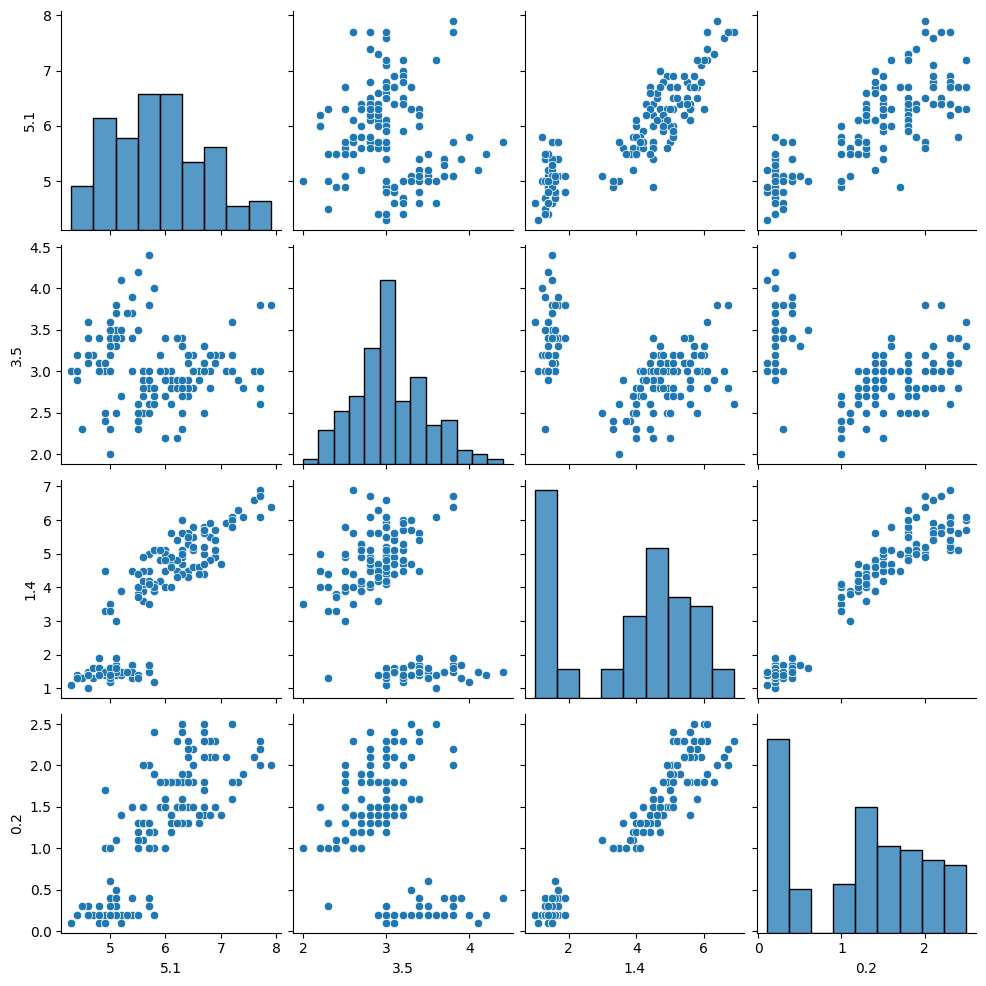

In [60]:
sns.pairplot(iris)

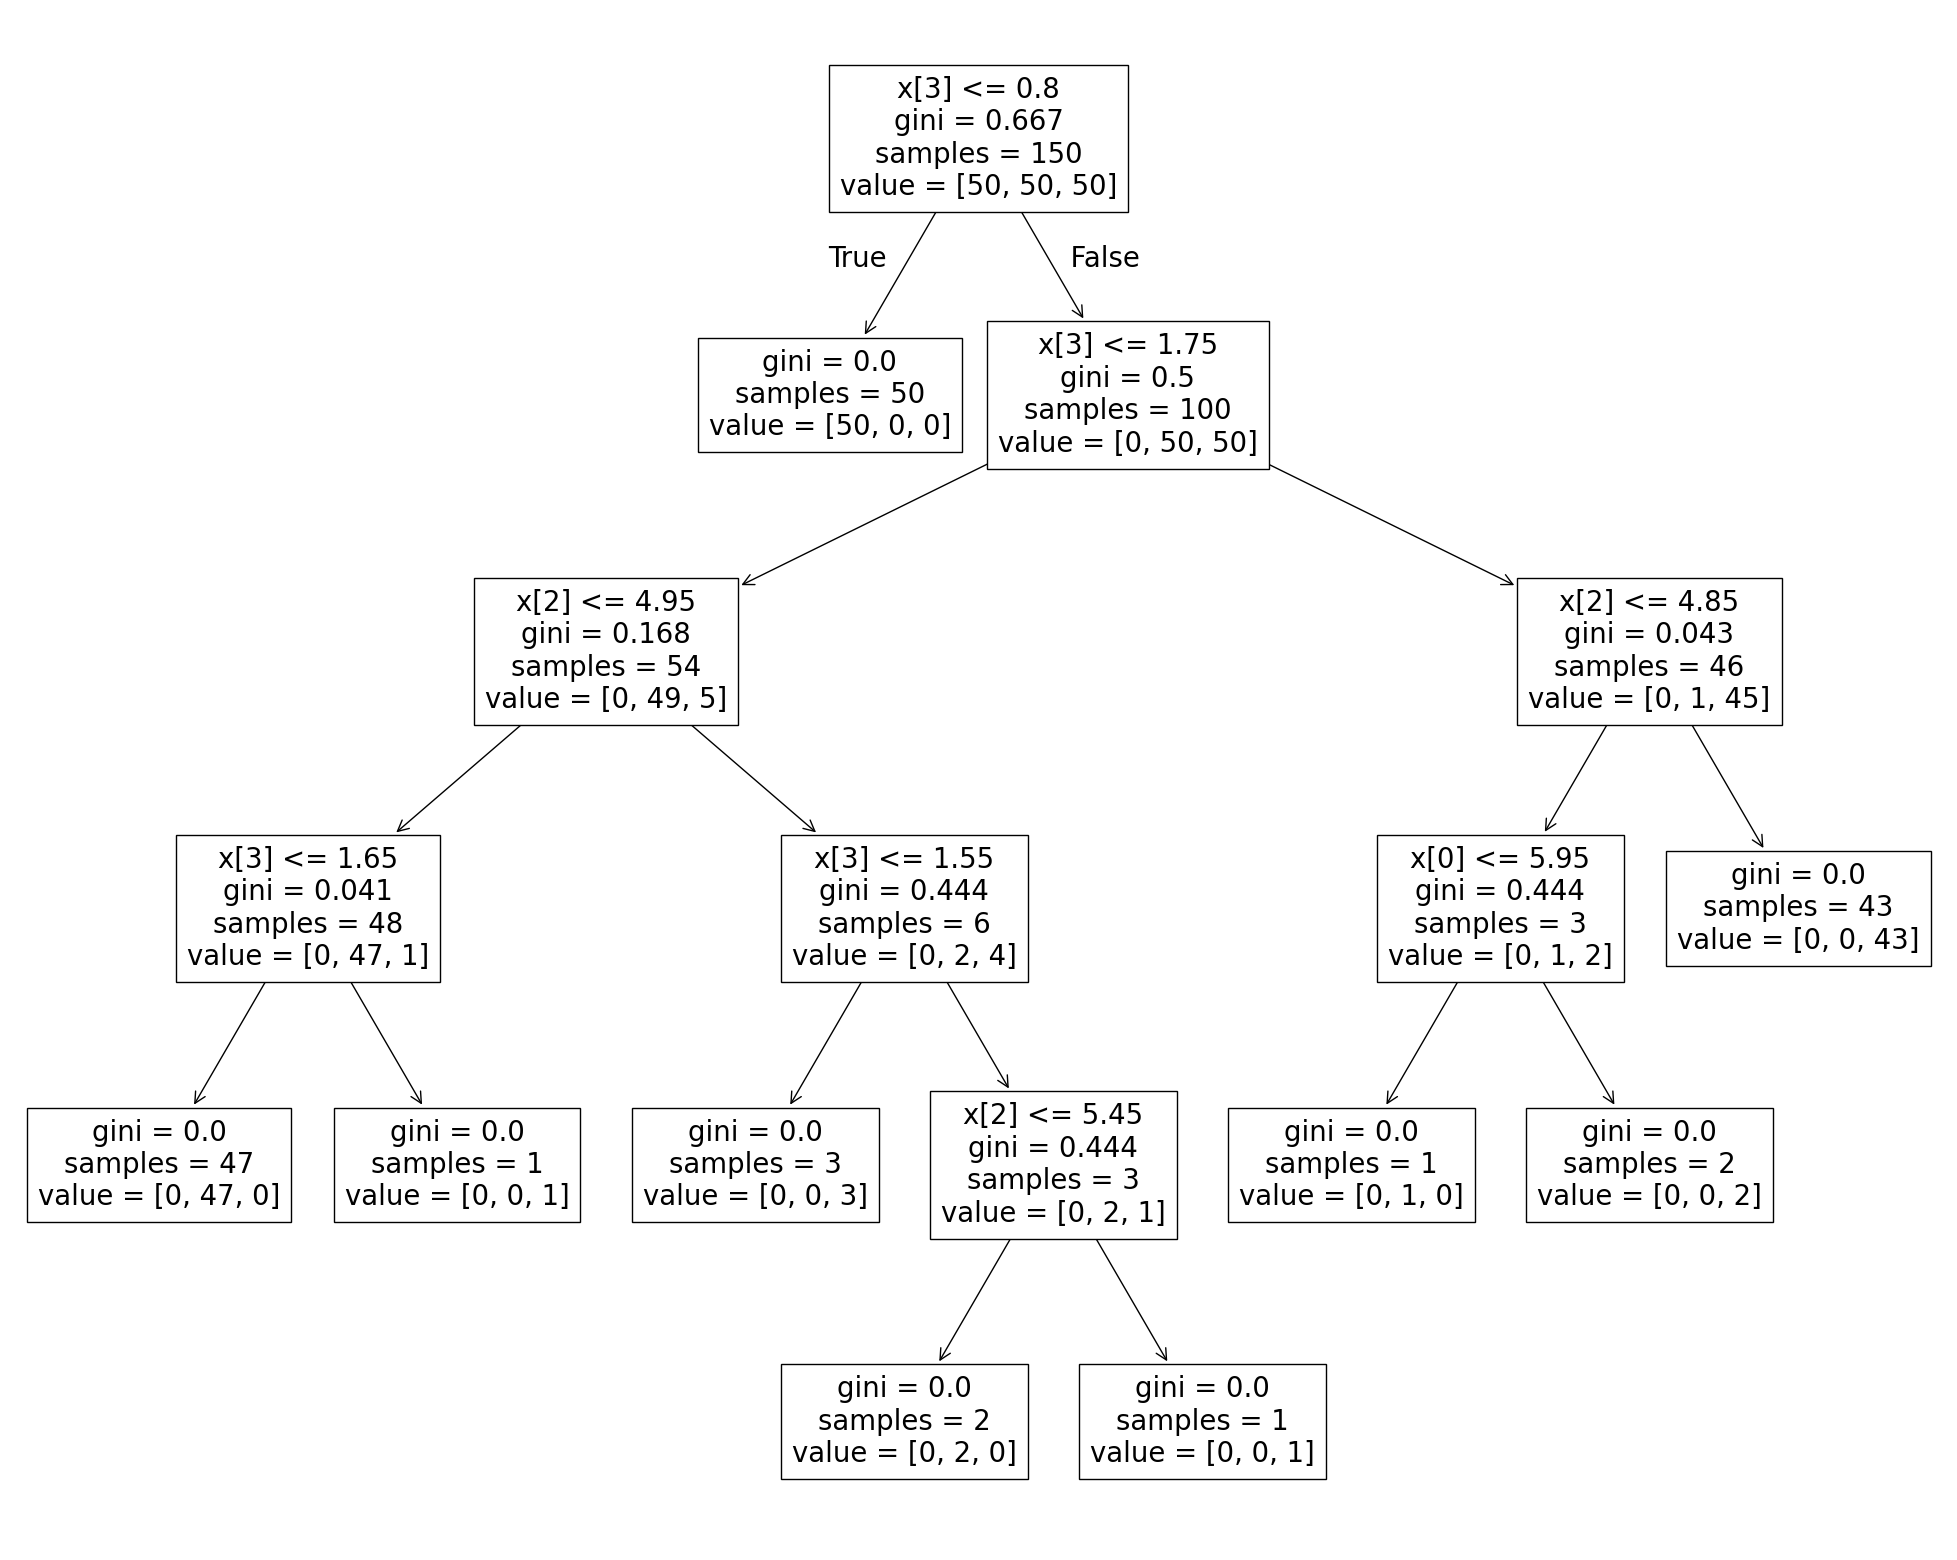

In [63]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
score=r2_score(y_test,y_pred)
print("The value of R squared is ",score)
print("The MSE is=",mean_squared_error(y_test,y_pred))
print("The RMSE value is=",np.sqrt(mean_squared_error(y_test,y_pred)))
score1=score
report=classification_report(y_test,y_pred)
print(report)
mat=confusion_matrix(y_test, y_pred)
print(mat)

Accuracy: 0.8208955223880597
The value of R squared is  0.2618350834911345
The MSE is= 0.1791044776119403
The RMSE value is= 0.42320736951515897
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268

[[145  12]
 [ 36  75]]


The Iris Data has an accuracy of 82%, which shows it as a good model for prediction.